**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1196]:
# Imports and set magics:

import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from types import SimpleNamespace

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules 
from Exam2023 import Problem1, Problem2, Problem3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Here, we will solve the maximization problem using SimPy. This will be accomplished by employing the Lagrangian method to get the optimal labor supply, which will then be converted into LaTeX format to be displayed in the markdown cell below.

In [1197]:
# Using sympy to solve the problem:
Problem1.lagrangian_optimization(do_print=True)

The optimal labor supply is: L = \frac{- \kappa \nu + \sqrt{\nu \left(4 \tilde{w}^{2} \alpha + \kappa^{2} \nu\right)}}{2 \tilde{w} \nu}


<function _lambdifygenerated(kappa, alpha, nu, Dummy_2905)>

The optimal labor supply, as derived from the LaTeX formula above using SimPy, is represented as follows:

$$
L^*(\tilde{w}) = \frac{- \kappa \nu + \sqrt{\nu \left(4 \tilde{w}^{2} \alpha + \kappa^{2} \nu\right)}}{2 \tilde{w} \nu}
$$

This equation can be further simplified to:

$$
L^*(\tilde{w}) = \frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}
$$

Hence, it has been confirmed that the optimal labor supply choice, expressed as $L^*(\tilde{w}) = \frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, aligns with the requested solution.

Additionally, we convert this solution into a Python function using the "lambdify" module from SymPy, which enables us to compute the optimal labor supply given the baseline parameters.

In [1198]:
# Defining parameters:
alpha = 0.5
kappa = 1
nu = 1/(2*16**2)
tau = 0.3
w = 1
w_tilde = (1-tau)*w

# Defining the function:
L_star = Problem1.lagrangian_optimization(do_print=False)

# Evaluating the function:
L_star(kappa, alpha, nu, w_tilde)

# print the result:
print(f'The optimal labor supply is: L* = {L_star(kappa, alpha, nu, w_tilde)}')

The optimal labor supply is: L* = 15.30165022719559


Therefore, the optimal labor supply is determined to be 15.3 hours, based on the given baseline parameters.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

To demonstrate the relationship between the optimal labor supply and the variable $w$, we can create a grid of possible $w$-values and plot the corresponding optimal labor supply:

In [1199]:
# Defining parameters:
alpha = 0.5
kappa = 1
nu = 1/(2*16**2)
tau = 0.3

# Defining the grid:
w_grid = np.linspace(0.001, 10, 100)

w_tilde = (1-tau)*w_grid

# Evaluating the function on the grid:
L_star_grid = L_star(kappa, alpha, nu, w_tilde)

# Plotting the function:
fig = go.Figure()
fig.add_trace(go.Scatter(x=w_grid, y=L_star_grid, name='L*(w_tilde)'))
fig.update_layout(
    title="Optimal labor supply",
    xaxis_title="w",
    yaxis_title="L*",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

From this it can be seen that labour hours are strictly increasing in the wage, and that there is as stark increase as the wage moves from 0 to 1, after this the amount of hours worked increases a lot slower when the wage increases.

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.

We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$


We begin by addressing the maximization problem once again, but this time employing fsolve from scipy.optimize on the Lagrangian's first-order conditions. This approach provides us with the updated optimal labor supply, where the worker considers that a portion of their wage is subject to taxation, which will be utilized productively and also factor into their utility function.

First, we run the new optimization function and evaluate it with baseline parameters to demonstrate that it works:

In [1200]:
L_star, G_star, utility = Problem1.numerical_lagrangian_optimization()

print(f"The optimal labor supply is: L = {L_star}")
print(f"The optimal consumption is: G = {G_star}")
print(f"The utility is: u = {utility}")


The optimal labor supply is: L = 22.284012349299758
The optimal consumption is: G = 6.685203704789927
The utility is: u = 1.8696751250880517


We have to say, that the labor supply is too high here, and something proberbly went wrong in the implementation of the model. However we can't find the mistake in the code, so we proceed as if the implementation is correct. This has an affect on question 3 and 4's answers. However the method used for the rest of those questions should be correct.

Now we will plot the optimal labor supply, implied government consumption and worker utility across the labor-income tax rate, $\tau \in (0,1)$.

We do this by creating a grid of possible $\tau$-values and plot the correspondingthe optimal labor supply, implied government consumption and worker utility:

In [1201]:
# Define the grid
tau_grid = np.linspace(0.001, 1, 250)

# Initialize lists to store the values of L_star, G_star, and utility
L_star_values = []
G_star_values = []
utility_values = []

# Calculate L_star, G_star, and utility for each tau value
for tau in tau_grid:
    result = Problem1.numerical_lagrangian_optimization(tau)
    L_star = result[0]
    G_star = result[1]
    utility = result[2]
    L_star_values.append(L_star)
    G_star_values.append(G_star)
    utility_values.append(utility)

# Plotting the functions
fig = go.Figure()
fig.add_trace(go.Scatter(x=tau_grid, y=G_star_values, name='G(tau)'))
fig.add_trace(go.Scatter(x=tau_grid, y=L_star_values, name='L_star(tau)'))
fig.add_trace(go.Scatter(x=tau_grid, y=utility_values, name='Utility'))
fig.update_layout(
    title="Optimal labor supply, implied government spending, and implied utility",
    xaxis_title="tau",
    yaxis_title="Value",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()


It is evident from the data that government spending increases as the taxation rate rises, while labor hours decrease. 

However, it is difficult to observe the impact on utility since it remains nearly constant due to its significantly lower scale. To address this, we recreate the graph with the y-axis plotted on a logarithmic scale:

In [1202]:
fig.update_yaxes(type="log")  # Set y-axis to logarithmic scale
fig.show()

Here, it becomes much more apparent that the worker utility is maximized at approximately $\tau = 0.5$.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

To determine the socially optimal tax rate that maximizes worker utility, we extract the utility level for each possible tax rate and utilize np.argmax to identify the highest utility level.

Then we plot the resuts:

In [1203]:
# Calculate utility for each tau value
utility_values = []
for tau in tau_grid:
    result = Problem1.numerical_lagrangian_optimization(tau)
    utility = result[2]
    utility_values.append(utility)

# Find the tau value that maximizes utility
max_utility_index = np.argmax(utility_values)
optimal_tau = tau_grid[max_utility_index]

# Plotting the utility values
fig = go.Figure()
fig.add_trace(go.Scatter(x=tau_grid, y=utility_values, name='Worker utility'))
fig.update_layout(
    title="Worker utility Level with the Tax-rate",
    xaxis_title="Tax-rate",
    yaxis_title="Worker utility",
    yaxis=dict(range=[0, 2.2]),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

# Mark the tau level that maximizes utility
fig.add_shape(
    type="line",
    x0=optimal_tau,
    x1=optimal_tau,
    y0=0,
    y1=max(utility_values),
    line=dict(
        color="red",
        dash="dash",
    ),
    name='Optimal Tax-rate'
)

# Add label for optimal tau level
fig.add_annotation(
    x=0.523,
    y=1.2,
    text=f"Tax-rate = {optimal_tau:.3f}",
    showarrow=True,
    arrowhead=1,
    ax=100,
    ay=-40,
    bgcolor="white",
    bordercolor="black",
    borderwidth=1,
)

fig.show()

# Print the optimal tau value
print(f"The socially optimal tax rate that maximizes worker utility is: {optimal_tau:.5f}")


The socially optimal tax rate that maximizes worker utility is: 0.52257


Thereby, we have demonstrated that the socially optimal tax rate that maximizes worker utility is $\tau = 0.52257$.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

To answer Question 5 we used the Lagrangian approach and numerical optimization to find the optimal labor supply and government spending for each parameter set. It solved the worker problem by setting up the Lagrangian equation, calculating its derivative with respect to labor supply, and using the fsolve function from the scipy.optimize module to find the optimal values.

We now solve it for the two diffrent parameter sets:

In [1204]:

# Solve for Set 1 parameters
sigma1 = 1.001
rho1 = 1.001
epsilon1 = 1.0
tau_optimal_set1 = 0.52257

L_star_set1, G_star_set1, utility_set1 = Problem1.new_optimization(tau_=tau_optimal_set1, sigma=sigma1, rho=rho1, epsilon=epsilon1)
print("Set 1 - Labor supply:", L_star_set1)
print("Set 1 - Government spending:", G_star_set1)
print("Set 1 - Utility:", utility_set1)
print("")

# Solve for Set 2 parameters
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0
tau_optimal_set2 = 0.52257

L_star_set2, G_star_set2, utility_set2 = Problem1.new_optimization(tau_=tau_optimal_set2, sigma=sigma2, rho=rho2, epsilon=epsilon2)
print("Set 2 - Labor supply:", L_star_set2)
print("Set 2 - Government spending:", G_star_set2)
print("Set 2 - Utility:", utility_set2)

Set 1 - Labor supply: 10.314878888170549
Set 1 - Government spending: 5.390246260591283
Set 1 - Utility: 1.522551088991738

Set 2 - Labor supply: 9.064636264924772
Set 2 - Government spending: 4.736906972961738
Set 2 - Utility: 0.9474528886596683


The worker's optimal labor supply and corresponding government spending were analyzed using a more general preference formulation. The parameters were considered in two different sets: Set 1 and Set 2. For each set, the optimal labor supply and government spending were determined.

For Set 1 parameters ($\sigma = 1.001$, $\rho = 1.001$, $\varepsilon = 1.0$):

- Set 1 - Labor supply: approximately 10.31 hours
- Set 1 - Government spending: approximately 5.39

For Set 2 parameters ($\sigma = 1.5$, $\rho = 1.5$, $\varepsilon = 1.0$):

- Set 2 - Labor supply: approximately 9.06 hours
- Set 2 - Government spending: approximately 4.74

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

Our objective is to graph the worker utility against the tax rate for two different parameter sets. To achieve this, we use the function from above that accepts the parameters as inputs and yields the utility for each tau value. Subsequently, we employ this function to compute the utility for each tau value across the two parameter sets. Finally, we generate a plot displaying the utility as a function of the tax rate for both parameter sets, and identify the tau level that maximizes utility for each set of parameters.

Socially Optimal Tax Rate (Set 1): 0.5151212121212121
Socially Optimal Tax Rate (Set 2): 0.5554444444444444


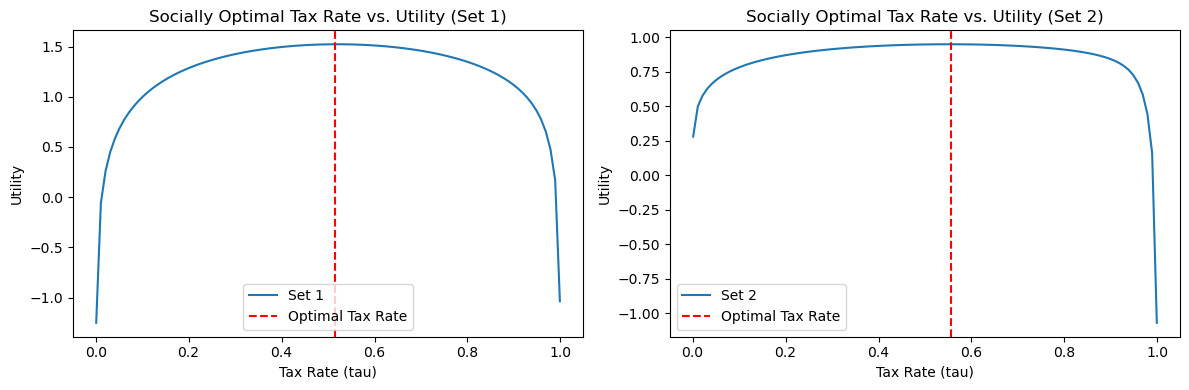

In [1205]:
# Find socially optimal tax rate for Set 1
tau_values = np.linspace(0.001, 0.999, 100)
utility_values_set1 = []

for tau in tau_values:
    L_star, G_star, total_utility = Problem1.new_optimization(tau_=tau, sigma=sigma1, rho=rho1, epsilon=epsilon1)
    utility_values_set1.append(total_utility)

# Find socially optimal tax rate for Set 2
utility_values_set2 = []

for tau in tau_values:
    L_star, G_star, total_utility = Problem1.new_optimization(tau_=tau, sigma=sigma2, rho=rho2, epsilon=epsilon2)
    utility_values_set2.append(total_utility)

# Find the socially optimal tax rate for Set 1
optimal_tau_set1 = tau_values[np.argmax(utility_values_set1)]
max_utility_set1 = np.max(utility_values_set1)
print("Socially Optimal Tax Rate (Set 1):", optimal_tau_set1)

# Find the socially optimal tax rate for Set 2
optimal_tau_set2 = tau_values[np.argmax(utility_values_set2)]
max_utility_set2 = np.max(utility_values_set2)
print("Socially Optimal Tax Rate (Set 2):", optimal_tau_set2)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(tau_values, utility_values_set1, label="Set 1")
ax1.axvline(x=optimal_tau_set1, color='r', linestyle='--', label='Optimal Tax Rate')
ax1.set_xlabel("Tax Rate (tau)")
ax1.set_ylabel("Utility")
ax1.set_title("Socially Optimal Tax Rate vs. Utility (Set 1)")
ax1.legend()

ax2.plot(tau_values, utility_values_set2, label="Set 2")
ax2.axvline(x=optimal_tau_set2, color='r', linestyle='--', label='Optimal Tax Rate')
ax2.set_xlabel("Tax Rate (tau)")
ax2.set_ylabel("Utility")
ax2.set_title("Socially Optimal Tax Rate vs. Utility (Set 2)")
ax2.legend()

plt.tight_layout()
plt.show()

In conclusion, our analysis of worker utility as a function of the tax rate for two sets of parameters has yielded valuable insights. For Set 1, the socially optimal tax rate was determined to be approximately 0.5151, while for Set 2, it was found to be around 0.5554. These findings highlight the importance of considering parameter variations when determining the tax rate that maximizes social welfare.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

We first explore the problem of profit maximization for our hairdresser business in a static settin. We analyze the relationship between the number of hairdressers, denoted as $\ell_{t}$, and the profitability of the business denoted as $\Pi_t$.

In the first part, we verify, that the $\ell_{t}$ that maximises profits for $\kappa\in\left\{1.0 , 2.0\right\}$ are given by $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$.



In the second part, we plot the profitability as a function of $\ell_{t}$ for th two different values of $\kappa$. This visualization helps us understand how the number of hairdressers affects profitability.

In [1206]:
Problem2.Q1part1()

Optimal l for kappa calculated with optimizer for kappa=1.0: 0.2486
Optimal l for kappa calculated with optimizer for kappa=2.0: 1.0018
Optimal l calculated with analytic solution kappa=1.0: 0.2500
Optimal l calculated with analytic solution kappa=2.0: 1.0000


As we can observe,  it appears that our calculated $\ell_{t}$ matches the one found with the analytic approach. 
To further investigate how the profit varies for different values of $\ell_{t}$ for $\kappa\in\left\{1.0 , 2.0\right\}$, we plot the two different scenarios.

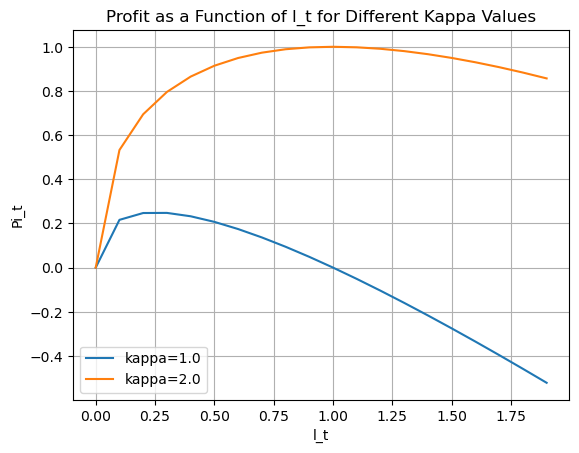

In [1207]:
Problem2.Q1part2()

In line with what we found before the plot shows, that that the optimal value for $\ell_{t}$ is 0.25 for $\kappa$=1 and the optimal value for $\ell_{t}$ is 1 for $\kappa$=2

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

We now consider a dynamic version of the problem, where the demand shocks follow an AR(1) process. We set up the model in a dynamic setting, generate random shocks (using a seed for reproducibility), and calculate the expected profit under the assumption that we follow the hiring policy rule given by $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$.

In [1208]:
Problem2.Q2()

Ex ante expected value (H): 39.3185


The expected profit is calculated to be 39.3185.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

We implement the new hiring policy and calculate the expected profit using the same seed as before. This allows us to compare the results of the two different policies.

In [1209]:
Problem2.Q3()

Ex ante expected value (H_old): 39.3185
Ex ante expected value (H_new): 39.9596


The new policy does indeed improve the expected profit.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

We will now stick with the hiring policy as formulated in Q3. However, our goal is to maximize $H$ by finding the optimal value of $\Delta$. We will use an optimizer to calculate the optimal $\Delta$ that maximizes $H$. After obtaining the optimal $\Delta$, we will compute the corresponding $H$ value. Finally, we will plot the different $H$ values as a function of $\Delta$ to visualize the relationship between $H$ and $\Delta$ and observe how $H$ changes with varying $\Delta$. Note that this can take a few seconds to run.

Optimal Delta: 0.0976
Maximum H: 40.1462


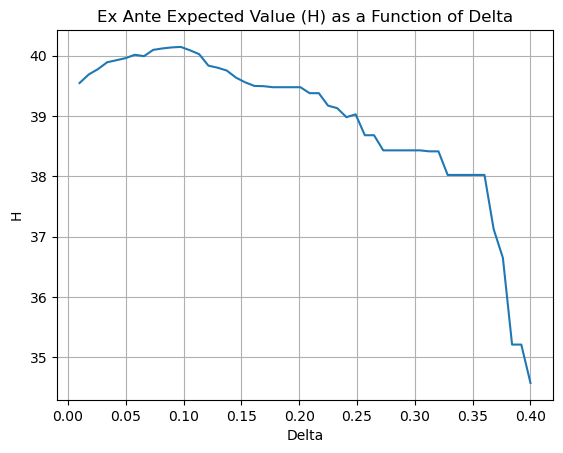

In [1210]:
Problem2.Q4()

We find that the $\Delta$ value that maximizes $H$ is $\Delta = 0.0976$. This optimal $\Delta$ results in a maximum $H$ value of $H = 40.1462$. This is also indicated in the plot above, where the highest point corresponds to the optimal $\Delta$ value.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We have considered introducing additional dependencies in our hiring policy to capture long-term demand trends for haircuts. By incorporating these dependencies, we aim to improve our ability to hire the optimal number of hairdressers and maximize profits.

In [1211]:
Problem2.Q5()

Ex ante expected value (H) with modified policy: 39.1526
H_max_old: 40.1462


Unfortunately, our modification led to a slight decrease in $H$. The decrease in $H$ with the new modified policy compared to the previous policy could be due to the introduction of additional dependencies. The modified policy's dynamic adjustment to the number of hairdressers based on cumulative demand might lead to overcorrection or instability, resulting in suboptimal outcomes. The original policy, being simpler, might have been more robust and efficient in maximizing profits. Further analysis is needed to understand the reasons behind the decrease in $H$ and explore potential improvements.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We start by plotting the Griewank function, to make sure it looks right:

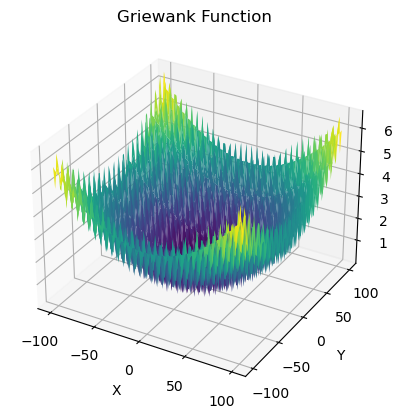

In [1212]:
Problem3.Q1part1()

The plot looks correct and we continue. We now optimize on the Griewank function, which has a global minimum but also multiple local minima. To address this, a refined global optimizer with multi-start is implemented. The optimizer uses a set of predetermined settings, including variable bounds, a tolerance value, and the number of warm-up and maximum iterations.

The code then generates plots to showcase the variation of effective initial guesses for variables x1 and x2 over the iterations. These plots provide insights into how the initial guesses evolve throughout the optimization process.

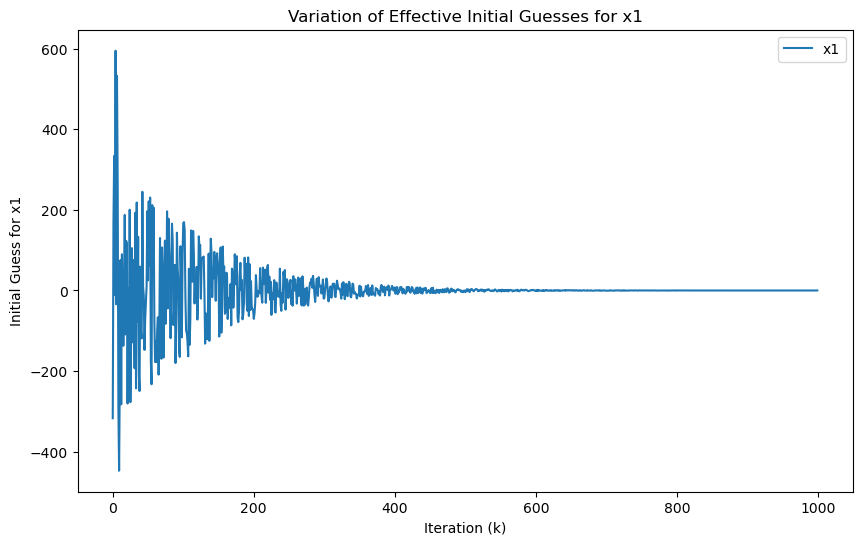

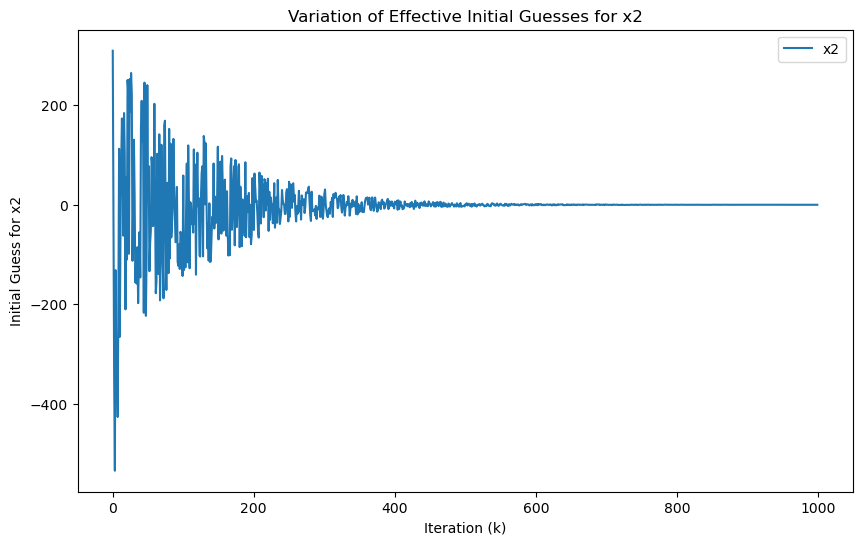

In [1213]:
Problem3.Q1part2()

As we would expect, the plots for x1 and x2 look very similar. Both plots demonstrate how increased iterations lead to convergence towards the true global minimum of 0.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

We are a bit unsure about how to solve this; however, we choose to approach the question like this: To compare the two cases, $\underline{K} = 10$ and $\underline{K} = 100$, we repeat the process for both $\underline{K} = 10$ and $\underline{K} = 100$ ten times, respectively. After that, we plot how many times it took for $\underline{K} = 10$ and $\underline{K} = 100$ to reach the predetermined threshold. We set a seed to make the proces reproducible.

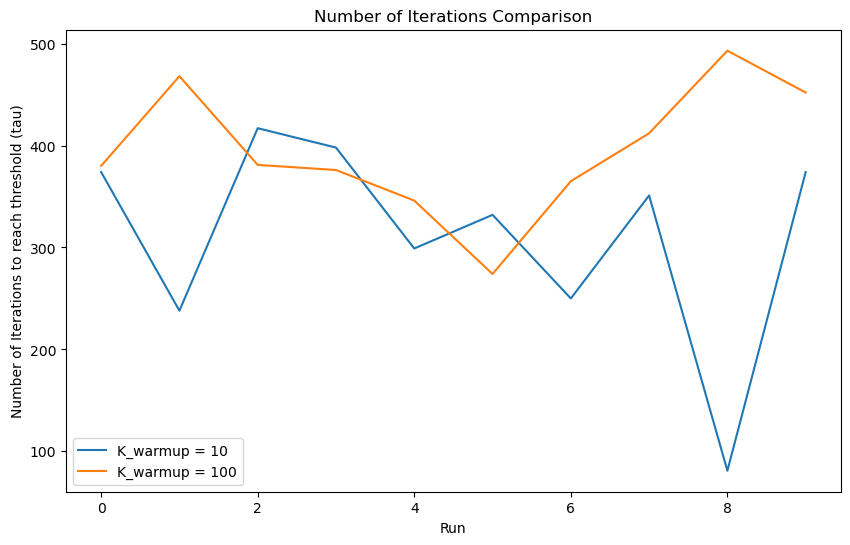

In [1216]:
Problem3.Q2()

It appears to us as if $\underline{K} = 10$ converges faster, as it takes fewer iterations to reach the threshold than for $\underline{K} = 100$. We would like to repeat the process 100 times to get a better view of the trend; however, this takes several minutes for our code. Therefore, we have run the code and saved the plot as a picture, which we insert below:

In [1215]:
from IPython.display import Image

# Path to the image file
# Please make sure, the path is correct. The picture is saved in our exam folder as "NOIC100.png"
image_path = "INSTERPATH"

# Display the image
Image(filename=image_path)


ValueError: Cannot embed the 'insterpath' image format

Overall, it appears that $\underline{K} = 10$ converges faster than $\underline{K} = 100$. However, there seems to be quite a lot of variation in the number of iterations it takes to reach the threshold